In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Data Reading

In [38]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [39]:
pd.set_option("display.max_columns",100)

In [40]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
data = np.array(data)
data.shape

(42000, 785)

In [42]:
m,n = data.shape
np.random.shuffle(data)

data_val = data[0:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]
X_val = X_val / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

## Weights initalization

In [43]:
import math
def init_params():
    w1 = np.random.rand(10,784) - 0.5 # 784 different values for 10 neuron
    b1 = np.random.rand(10,1) - 0.5  # 1 bias for each neuron
    w2 = np.random.rand(10,10) - 0.5 # 10 weights for each neuron of output layer 
    b2 = np.random.rand(10,1) - 0.5 # 1 bias for each neuron of ouput layer


#     k = 1
#     k = 5
#     w1 = np.random.randn(10,784)/k
#     b1 = np.random.randn(10,1)/k
#     w2 = np.random.randn(10,10)/k
#     b2 = np.random.randn(10,1)/k
    

    return w1,b1,w2,b2


w = init_params()
print(max(w[0][0]),min(w[0][0]),np.size(w[0][0]))
# max and min values of first neuron of first layer (dimentions  = 784 x 1)

# Ouput if k = 1
# 3.4265582256027436 -3.2656597944363455 784

0.4990454635137952 -0.4966470569362569 784


## For np.random.rand(10,784)
> 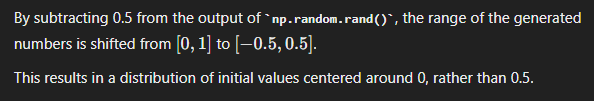
## 
## For np.random.randn(10,784)
> ##  But in case of randn int will initially make the higher or lower weights. which will lead to Vanishing or Exploding Gradients problem so we can do two things
> ### 1) Either Increase the Learning rates (But this will lead to vanishing gradients)
> ### 2) or We shift the standard deviation of randn initialization by dividing using positigve integer (k>2)

## Forward Propagation

In [44]:
def forward_prop(w1,b1,w2,b2,X,activation):
    z1 = w1.dot(X) +  b1
    a1 = activation(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1,a1,z2,a2

## Backward Propagation

In [45]:
def back_prop(z1,a1,z2,a2,w1,w2,x,y,derivative_activation):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) *  derivative_activation(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1,db1,dw2,db2

## Update Weights(params)

In [46]:

def update_params(w1,b1,w2,b2, dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1,b1,w2,b2

## One Hot Encoding and Softmax

In [47]:
def one_hot(Y):
    one_hot_y = np.zeros((Y.size,Y.max() + 1))
    one_hot_y[np.arange(Y.size),Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y


def softmax(l):
    A = np.exp(l)/sum(np.exp(l))
    return A

In [48]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,y):
    return np.sum(predictions==y)/y.size

def gradient_descent(x,y,iterations,alpha,Activation,derive_Activation):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x,Activation)
        dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w1,w2,x,y,derive_Activation)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i % 50==0:
            print("Iteration:",i)
            print("Acuuracy:", get_accuracy(get_predictions(a2),y))
    return w1,b1,w2,b2

## ReLU as Activation Function

In [49]:
def ReLU(z):
    return np.maximum(z,0)

def derive_ReLU(z):
    return z>0

In [50]:
w1_relu,b1_relu,w2_relu,b2_relu = gradient_descent(X_train,Y_train,501,0.08,ReLU,derive_ReLU)

Iteration: 0
Acuuracy: 0.11131707317073171
Iteration: 50
Acuuracy: 0.2693658536585366
Iteration: 100
Acuuracy: 0.42878048780487804
Iteration: 150
Acuuracy: 0.5769512195121951
Iteration: 200
Acuuracy: 0.657829268292683
Iteration: 250
Acuuracy: 0.7113658536585366
Iteration: 300
Acuuracy: 0.747390243902439
Iteration: 350
Acuuracy: 0.7729512195121951
Iteration: 400
Acuuracy: 0.7913658536585366
Iteration: 450
Acuuracy: 0.8053414634146342
Iteration: 500
Acuuracy: 0.8169512195121951


## GeLU as Activatoin Function


## Approximation of GeLU
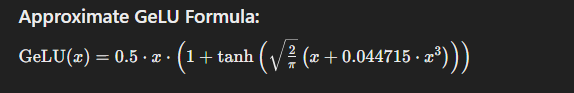

## Derivation of Approximate GeLU

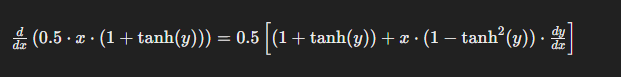

In [51]:
def GeLU(z):
    ez = np.exp(np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    enz = np.exp(-np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    tanh = (ez - enz) / (ez + enz)
    return 0.5 * z * (1 + tanh)

def derive_GeLU(z):
    dr = np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * z**2)
    ez = np.exp(np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    enz = np.exp(-np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    tanh = (ez - enz) / (ez + enz)
    tanh2 = tanh**2
    return 0.5 * ((1 + tanh) + z * (1 - tanh2) * dr)


In [52]:
w1_gelu,b1_gelu,w2_gelu,b2_gelu = gradient_descent(X_train,Y_train,501,0.08,GeLU,derive_GeLU)

Iteration: 0
Acuuracy: 0.10419512195121951
Iteration: 50
Acuuracy: 0.3013658536585366
Iteration: 100
Acuuracy: 0.43214634146341463
Iteration: 150
Acuuracy: 0.5334878048780488
Iteration: 200
Acuuracy: 0.6179756097560976
Iteration: 250
Acuuracy: 0.6892682926829268
Iteration: 300
Acuuracy: 0.7371463414634146
Iteration: 350
Acuuracy: 0.7680731707317073
Iteration: 400
Acuuracy: 0.7895121951219513
Iteration: 450
Acuuracy: 0.8063414634146342
Iteration: 500
Acuuracy: 0.8188292682926829


## Sigmoid as Activation
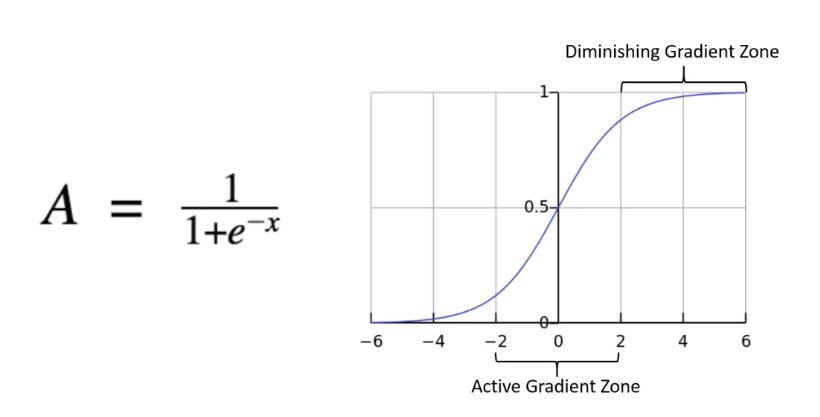

In [53]:
## Sigmoid

def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Derivaton of Sigmoid
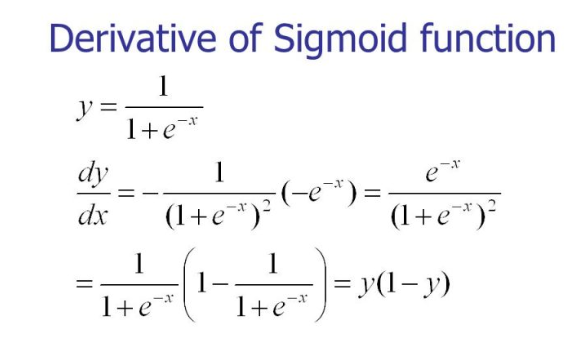

In [54]:
def derive_sigmoid(z):
#     return Sigmoid(z)*(1-Sigmoid(z))
    return np.exp(-z)/(1+np.exp(-z))**2

In [75]:
w1_sigmoid,b1_sigmoid,w2_sigmoid,b2_sigmoid = gradient_descent(X_train,Y_train,501,0.1,Sigmoid,derive_sigmoid)

Iteration: 0
Acuuracy: 0.06282926829268293
Iteration: 50
Acuuracy: 0.16165853658536586
Iteration: 100
Acuuracy: 0.277609756097561
Iteration: 150
Acuuracy: 0.3800731707317073
Iteration: 200
Acuuracy: 0.45665853658536587
Iteration: 250
Acuuracy: 0.5171463414634146
Iteration: 300
Acuuracy: 0.5628292682926829
Iteration: 350
Acuuracy: 0.5988536585365853
Iteration: 400
Acuuracy: 0.6299024390243902
Iteration: 450
Acuuracy: 0.655829268292683
Iteration: 500
Acuuracy: 0.6770975609756098


## Visualization

In [76]:
import matplotlib.pyplot as plt

In [77]:
def make_predictions(x,w1,b1,w2,b2,Activation):
    a,b,c,d = forward_prop(w1,b1,w2,b2,x,Activation)
    predictions = get_predictions(d)
    return predictions

In [78]:
def test_predictions(index, w1, b1, w2, b2,Activation):
    current_image = X_train[:,index,None]
    prediction = make_predictions(X_train[:,index,None], w1, b1, w2, b2,Activation)
    label = Y_train[index]
    print("Predictions:", prediction)
    print("Label:", label)
    
    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()

Predictions: [4]
Label: 4


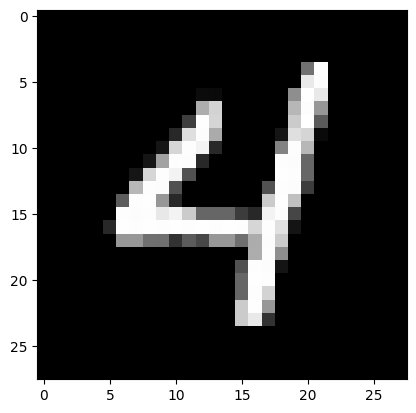

In [79]:
test_predictions(8,w1_relu,b1_relu,w2_relu,b2_relu,ReLU)

In [80]:
# validation prediction
val_pred = make_predictions(X_val,w1_relu,b1_relu,w2_relu,b2_relu,ReLU)
print("ReLU accuracy :")
get_accuracy(val_pred,Y_val)

ReLU accuracy :


0.82

In [81]:
# validation prediction
val_pred = make_predictions(X_val,w1_gelu,b1_gelu,w2_gelu,b2_gelu,GeLU)
print("GeLU accuracy :")
get_accuracy(val_pred,Y_val)

GeLU accuracy :


0.815

In [82]:
# validation prediction
val_pred = make_predictions(X_val,w1_sigmoid,b1_sigmoid,w2_sigmoid,b2_sigmoid,Sigmoid)
print("Sigmoid accuracy :")
get_accuracy(val_pred,Y_val)

Sigmoid accuracy :


0.666